# Energia mecânica Total

Demonstração de que a frequência natural é a única frequência na qual um oscilador harmônico tem energia mecânica total constante.



Para um oscilador harmônico, o deslocamento é dado por

$$ x(t) = A \cos(\omega t - \phi), $$

então a velocidade é dada por

$$ \dot x(t) = -\omega A \sin(\omega t - \phi).$$

As energias potencial e cinética do oscilador variam com o tempo, e sâo dadas por,

$$ U(t) = \frac{1}{2} k x(t)^2, \quad T(t) = \frac{1}{2} m \dot x(t)^2,$$

e para o caso do oscilador harmônico, temos

$$ U(t) = \frac{1}{2} k\left( A \cos(\omega t - \phi)\right)^2, \quad T(t) = \frac{1}{2} m \left( -\omega A \sin(\omega t - \phi) \right)^2,$$

ou

$$ U(t) = \frac{1}{2} k A^2 \cos^2(\omega t - \phi), \quad T(t) = \frac{1}{2} m \omega^2 A^2 \sin^2(\omega t - \phi).$$


Mas sabemos que
$$ \cos^2(a) = \frac{1}{2}\left(1+\cos 2a \right), \quad
\sin^2(a) = \frac{1}{2}\left(1-\cos 2a \right),
$$
então tanto a energia potencial quanto a energia cinética são senoidais, sempre positivas, com a frequência igual ao dobro da frequência de oscilação.

Para um sistema não amortecido, não há dissipação de energia e portanto a energia mecânica total é constante, isto é

$$ E(t) = U(t) + T(t) =  \frac{1}{2} k A^2 \cos(\omega t - \phi)^2 +\frac{1}{2} m \omega^2 A^2 \sin(\omega t - \phi)^2 = \text{cte.}$$

A única maneira para que esta soma independa do tempo é se $k = m \omega^2$, que nos permite colocar em evidência qualquer um dos lados desta equação, por exemplo, colocando $k$ em evidência,

$$ E(t) = U(t) + T(t) =  \frac{1}{2} k A^2 \left( \cos^2(\omega t - \phi) +   \sin^2(\omega t - \phi) \right)  =  \frac{1}{2} k A^2, $$

que é a energia potencial máxima, ou, de forma análoga, colocando $m\omega^2$ em evidência, 

$$ E(t) = U(t) + T(t) =   \frac{1}{2} m\omega^2 A^2,$$

que é energia cinética máxima do oscilador harmônico.

É claro então que a única frequência para qual a energia mecânica total é constante é a que resolve a equação $k = m \omega^2$, portanto é

$$ \omega = \omega_n = \sqrt\frac{k}{m}.$$

## Exemplo numérico

Vamos considerar um oscilador com $m=1\,\text{kg}$ e $k = 40\,\text{N}/{\text{m}}$, cujas condições iniciais são tais que a amplitude de vibração é unitária e o ângulo de fase é 45 graus.

### Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import BoundedFloatText, interact
import ipympl
%matplotlib widget

In [2]:
m = 1
k = 40
A = 1
ϕ = np.pi/4
ωn = np.sqrt(k/m)
print(f'ωn = {ωn:.4f}')

ωn = 6.3246


### Plotagem

interactive(children=(BoundedFloatText(value=6.324555320336759, description='ω', max=12.649110640673518, step=…

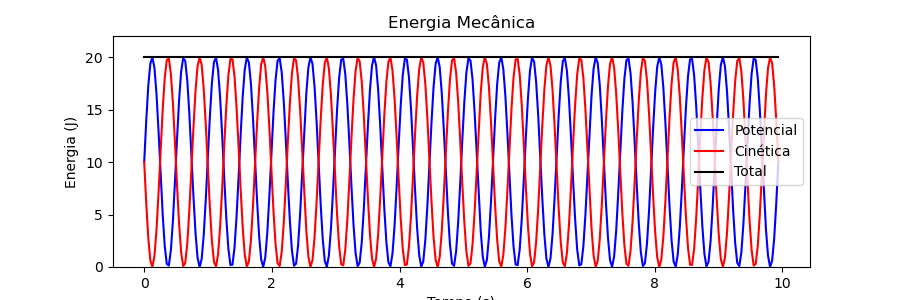

In [25]:
τn = 2*np.pi/ωn
nt = 10   # Number of periods to plot
ntp = 31   # Points to plot per period
tf  =  nt*τn    # final time
ntt =  ntp*nt    # total number of points

times = np.linspace(0, tf, ntt)

def energies(A, m, k, times, ϕ, ω): 
    U = 0.5*(A**2)*k*np.cos(ω*times - ϕ)**2
    T = 0.5*(A**2)*m*(ω**2)*np.sin(ω*times - ϕ)**2    
    E = U + T
    return U, T, E

ω = ωn
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(9)
ax.set_title('Energia Mecânica')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Energia (J)')   
Ut, Tt, Et = energies(A, m, k, times, ϕ, ω)
Ul = ax.plot(times, Ut, label='Potencial',  color='blue')
Tl = ax.plot(times, Tt, label='Cinética',  color='red')
El = ax.plot(times, Et, label='Total', color='black')
ax.legend()

Aw = BoundedFloatText(value=ωn, min=0, max=2*ωn, step=0.1, readout_format='.2f', label='Frequência:')

@interact(ω=Aw)
def do_plot(ω):
    Ut, Tt, Et = energies(A, m, k, times, ϕ, ω)
    Ul[0].set_ydata(Ut)
    Tl[0].set_ydata(Tt)
    El[0].set_ydata(Et)
    ax.set_ylim(0, 1.1*np.max(Et))

